## Javad Ranjbar Kermani
## KMeans clustering for compressing images

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(1024, 1024, 3)


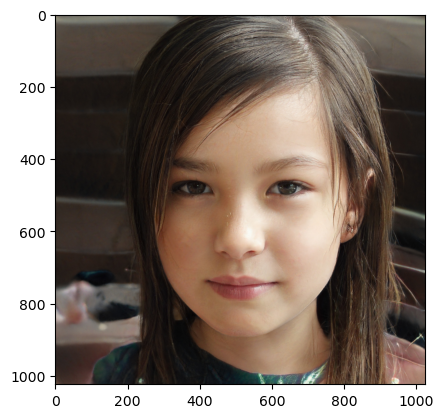

In [2]:
#importing image
image = plt.imread('image.jpg')
print(image.shape)
plt.imshow(image)
plt.show()

In [3]:
# converting image RGB matrix into dataframe with columns : red, green and blue
colors = image.reshape(-1,3)
print(colors.shape)
pd.DataFrame(colors , columns = ['red', 'green', 'blue'])

(1048576, 3)


,red,green,blue
0,118,119,101
1,106,104,89
2,103,101,88
3,101,99,87
4,96,96,86
...,...,...,...
1048571,152,124,112
1048572,156,128,116
1048573,162,133,125
1048574,182,153,147


### kmeans clustering

In [4]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 8) #8 clusters
kmean.fit(colors) #fit to the intensity of different red, green and blue colors

KMeans()

In [5]:
print(kmean.cluster_centers_) #Coordinates of cluster centers
kmean.cluster_centers_.reshape(2,4,3) #converting to valid shape for image data

[[ 56.47297433  44.36177338  37.25871519]
 [166.56667139 138.06003119 117.29335035]
 [230.11096449 209.20832833 190.11571797]
 [ 27.38356164  22.02387307  19.16876003]
 [200.61881892 172.17860834 148.56915146]
 [118.54019641 108.55407537  98.8442192 ]
 [145.73843155 100.69704569  74.51654455]
 [ 88.52584157  70.56706696  58.86132406]]


array([[[ 56.47297433,  44.36177338,  37.25871519],
        [166.56667139, 138.06003119, 117.29335035],
        [230.11096449, 209.20832833, 190.11571797],
        [ 27.38356164,  22.02387307,  19.16876003]],

       [[200.61881892, 172.17860834, 148.56915146],
        [118.54019641, 108.55407537,  98.8442192 ],
        [145.73843155, 100.69704569,  74.51654455],
        [ 88.52584157,  70.56706696,  58.86132406]]])

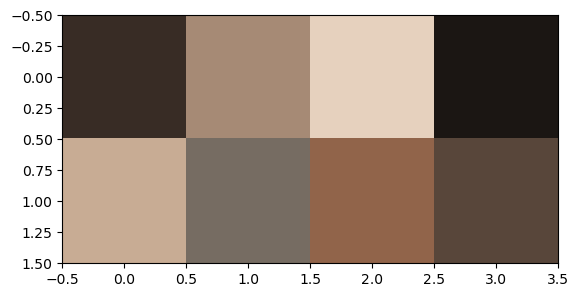

In [6]:
# the most used colors in the image
plt.imshow(kmean.cluster_centers_.reshape(2,4,3).astype(int))
plt.show()

In [7]:
#labels of different 8 clusters
print(kmean.labels_.shape) 
np.size(kmean.labels_)

(1048576,)


1048576

In [8]:
# cluster center of different labels
kmean.cluster_centers_[kmean.labels_].shape

(1048576, 3)

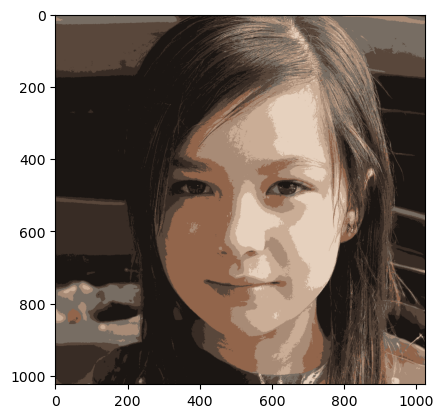

In [9]:
# showing compressed image with 8 most used colors (kmeans with 8 clusters)
kmean = KMeans(n_clusters = 8,init='random')
kmean.fit(colors)
color = kmean.cluster_centers_.astype(int)[kmean.labels_].reshape(image.shape)
plt.imshow(color)
plt.show()

K = 2


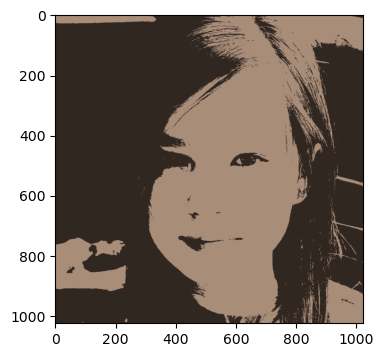

K = 4


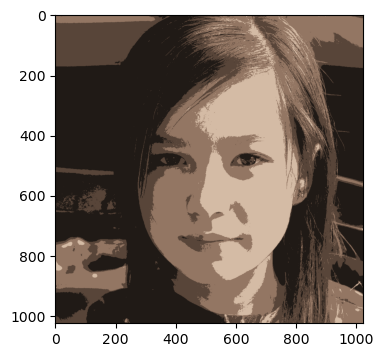

K = 8


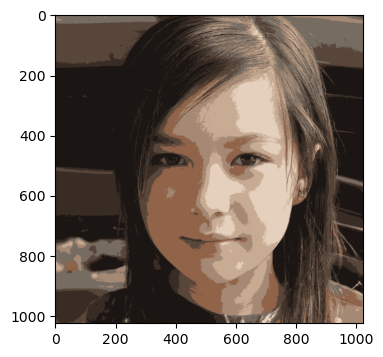

K = 16


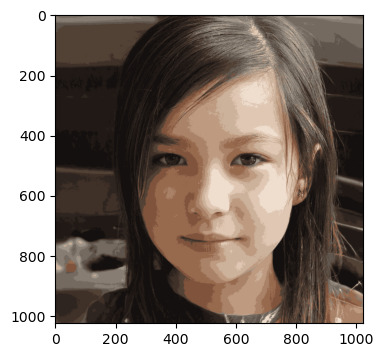

In [10]:
# showing compressed images with 2, 4, 8, 16 most used colors
number_of_clusters = {"K = 2": 2,"K = 4": 4, "K = 8": 8, "K = 16": 16}
for i,j in number_of_clusters.items():
    
    print(i)
    kmean = KMeans(n_clusters = j)
    kmean.fit(colors)
    color = kmean.cluster_centers_.astype(int)[kmean.labels_].reshape(image.shape)
    plt.figure(figsize=(5, 4))
    plt.imshow(color)
    plt.show()